### EDA_Acc_vel_loc_sinrangos.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a 
internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Datos de acceso por localidad sin rangos de velocidad."**, que proporciona 
información detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles 
anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights 
valiosos.

In [50]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Acc_vel_loc_sinrangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [51]:
import sweetviz as sv
from skimpy import skim

In [52]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       18864 non-null  object 
 1   Partido         18864 non-null  object 
 2   Localidad       18863 non-null  object 
 3   Link indec      18864 non-null  object 
 4   Velocidad_mbps  18864 non-null  int64  
 5   Accesos         18860 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 884.4+ KB
None
      Provincia     Partido   Localidad Link indec  Velocidad_mbps  Accesos
0  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0      1.0
1  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0      2.0
2  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0     19.0
3  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               3     85.0
4  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               3    145.0


In [53]:
# Mostrar primeras filas del DataFrame
print("\nInformación del DataFrame:")
df.head()


Información del DataFrame:


,Provincia,Partido,Localidad,Link indec,Velocidad_mbps,Accesos
0,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,0,1.0
1,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,0,2.0
2,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,0,19.0
3,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,3,85.0
4,BUENOS AIRES,25 DE MAYO,25 DE MAYO,6854100,3,145.0


In [54]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 18864  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %                   ┃ mean   ┃ sd    ┃ p0  ┃ p25 ┃ p50 ┃ p75 ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Velocidad_mbps   │   0 │                      0 │  66.81 │   179 │   0 │   3 │  10 │  30 │   1024 │   ▇    │  │
│ │ Accesos          │   4 │   0.021204410517387615 │  613.1 │  6283 │   0 │   3 │  26 │ 180 │ 576800 │   ▇    │  │
│ └──────────────────┴─────┴────────────────────────┴────────┴───────┴─────┴─────┴─────┴─────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Provincia │  0 │         0 │ CABA     │ SANTIAGO  │ BUENOS   │ TUCUMÁN   │     9.55 │       1.7 │    31742 │  │
│ │           │    │           │          │ DEL       │ AIRES    │           │          │           │          │  │
│ │           │    │           │          │ ESTERO    │          │           │          │           │          │  │
│ │ Partido   │  0 │         0 │ AMBA     │ CIUDAD    │ 12 DE    │ ÑORQUÍN   │     10.1 │       1.6 │    30905 │  │
│ │           │    │           │          │ AUTÓNOMA  │ OCTUBRE  │           │          │           │          │  │
│ │           │    │           │          │ DE BUENOS │          │           │          │           │          │  │
│ │           │    │           │          │ AIRES     │          │           │          │           │          │  │
│ │ Localidad │  1 │ 0.0053011 │ MAZA     │ DIAGONAL  │ 11 DE    │ ÑORQUINCÓ │     12.5 │         2 │    38388 │  │
│ │           │    │ 026293469 │          │ NORTE -   │ OCTUBRE  │           │          │           │          │  │
│ │           │    │        04 │          │ LUZ Y     │          │           │          │           │          │  │
│ │           │    │           │          │ FUERZA -  │          │           │          │           │          │  │
│ │           │    │           │          │ LOS       │          │           │          │           │          │  │
│ │           │    │           │          │ POCITOS - │          │           │          │           │          │  │
│ │           │    │           │          │ VILLA     │ 

In [55]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Provincia', 'Partido', 'Localidad', 'Link indec', 'Velocidad_mbps', 'Accesos']


In [56]:
# Reemplazar 'SinDato' por NaN en las columnas especificadas
df.replace('Sin Dato', np.nan, inplace=True)

# Verificar y cambiar el tipo de dato de las columnas
conversiones = {
    'Link_Indec': 'int64',
    'Velocidad (Mbps)': 'float64',
    'Accesos': 'int64'
}

for columna, tipo in conversiones.items():
    if columna in df.columns:
        try:
            df[columna] = df[columna].astype(tipo)
            print(f"La columna '{columna}' ha sido convertida a {tipo}.")
        except ValueError as e:
            print(f"No se pudo convertir la columna '{columna}' a {tipo} debido a un error: {e}")
    else:
        print(f"La columna '{columna}' no existe en el DataFrame.")

La columna 'Link_Indec' no existe en el DataFrame.
La columna 'Velocidad (Mbps)' no existe en el DataFrame.
No se pudo convertir la columna 'Accesos' a int64 debido a un error: Cannot convert non-finite values (NA or inf) to integer


In [57]:

# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Acc_vel_loc_sinrangos.csv


In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       18864 non-null  object 
 1   Partido         18864 non-null  object 
 2   Localidad       18863 non-null  object 
 3   Link indec      18864 non-null  object 
 4   Velocidad_mbps  18864 non-null  int64  
 5   Accesos         18860 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 884.4+ KB
None


Encontramos datos faltantes en accesos, por lo cual la diferencia encantidad de registros, sin embargo luego del análisis se determina la importancia de esto dentro del set de datos.

In [59]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [60]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']

Valores únicos en 'Partido' después de los reemplazos:
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARE

Al normalizar se unifican nombre de Provincias, Localidades y Partido.

In [61]:

# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Acc_vel_loc_sinrangos.csv



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Provincia             Partido Localidad Link indec  Velocidad_mbps  \
count          18864               18864     18863      18864    18864.000000   
unique            24                 432      2775       2665             NaN   
top     BUENOS AIRES  GENERAL SAN MARTÍN     OTROS    6371010             NaN   
freq            7172                 460       132        367             NaN   
mean             NaN                 NaN       NaN        NaN       66.811440   
std              NaN                 NaN       NaN        NaN      179.007248   
min              NaN                 NaN       NaN        NaN        0.000000   
25%              NaN                 NaN       NaN        NaN        3.000000   
50%              NaN                 NaN       NaN        NaN       10.000000   
75%              NaN                 NaN       NaN        NaN       30.000000   
max              NaN               

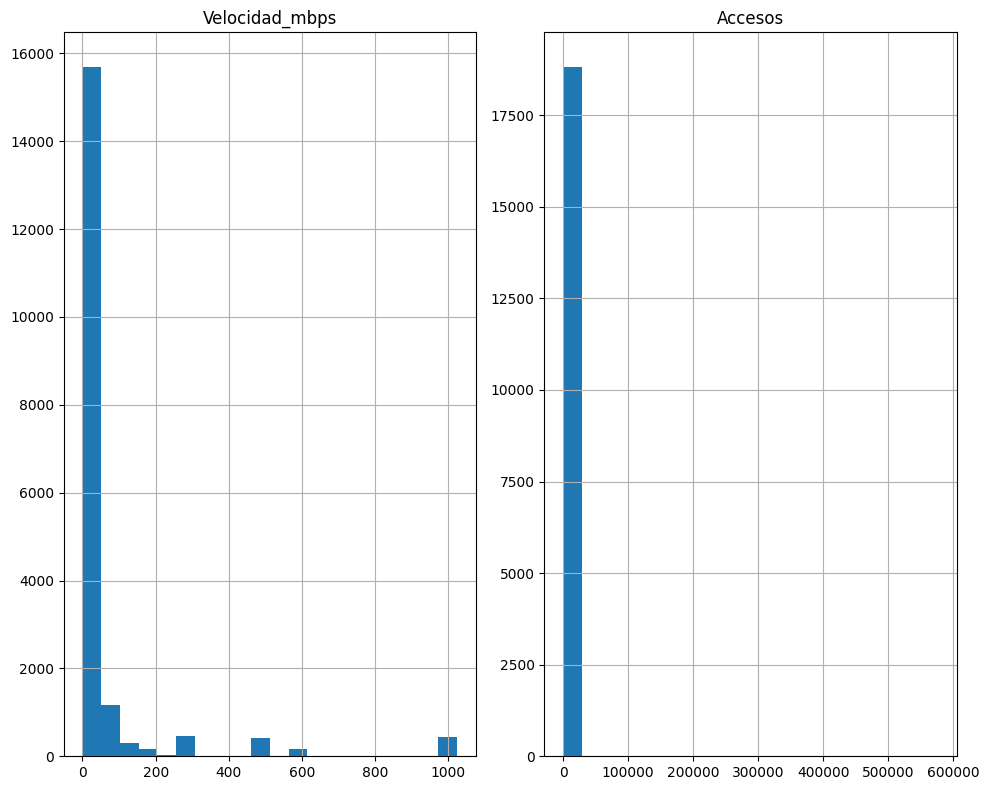

In [62]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                Velocidad_mbps   Accesos
Velocidad_mbps        1.000000  0.037237
Accesos               0.037237  1.000000


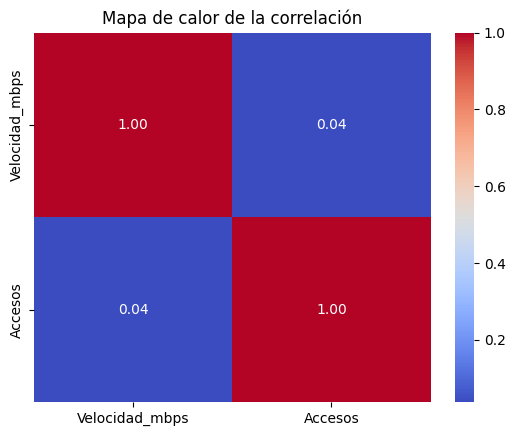

In [63]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [64]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Partido:
Partido              12 DE OCTUBRE  1º DE MAYO  2 DE ABRIL  25 DE MAYO  \
Provincia                                                                
BUENOS AIRES                     0           0           0          49   
CABA                             0           0           0           0   
CATAMARCA                        0           0           0           0   
CHACO                           15          18           7          11   
CHUBUT                           0           0           0           0   
CORRIENTES                       0           0           0           0   
CÓRDOBA                          0           0           0           0   
ENTRE RÍOS                       0           0           0           0   
FORMOSA                          0           0           0           0   
JUJUY                            0           0           0           0   
LA PAMPA                         0           0           0     

In [65]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
       Velocidad_mbps  Accesos
0           -0.373243      NaN
1           -0.373243      NaN
2           -0.373243      NaN
3           -0.356484      NaN
4           -0.356484      NaN
...               ...      ...
18859        0.185408      NaN
18860        1.302711      NaN
18861        2.420014      NaN
18862        2.978665      NaN
18863        5.213271      NaN

[18864 rows x 2 columns]


## Análisis de Z-scores

Los Z-scores son una medida estadística que indica cuántas desviaciones estándar se encuentra un valor respecto a la media de su distribución. En este análisis, se han calculado los Z-scores para las columnas numéricas del DataFrame, específicamente para las columnas 'Velocidad (Mbps)' y 'Accesos'.

### Interpretación de Z-scores

- **Valores cercanos a 0**: Indican que los datos están cerca de la media.
- **Valores positivos altos**: Indican que los datos están muy por encima de la media.
- **Valores negativos bajos**: Indican que los datos están muy por debajo de la media.

### Observaciones

- **Velocidad (Mbps)**: Se observan Z-scores altos en algunos registros, lo que indica la presencia de valores extremadamente altos en la velocidad de internet. Esto puede deberse a la adopción de nuevas tecnologías que ofrecen velocidades más altas.
- **Accesos**: También se observan Z-scores altos en algunos registros, lo que sugiere que algunas localidades tienen un número de accesos a internet significativamente mayor que otras.

### Visualización

La gráfica de Z-scores muestra picos en ciertos índices, lo que puede indicar la presencia de valores atípicos (outliers). Estos valores atípicos pueden ser errores en los datos o pueden tener una causa legítima que requiere una revisión adicional.

### Conclusión

El análisis de Z-scores es útil para identificar valores atípicos y entender la distribución de los datos en relación con la media. Los valores atípicos identificados pueden ser investigados más a fondo para determinar su causa y tomar decisiones informadas sobre cómo manejarlos en el análisis de datos.


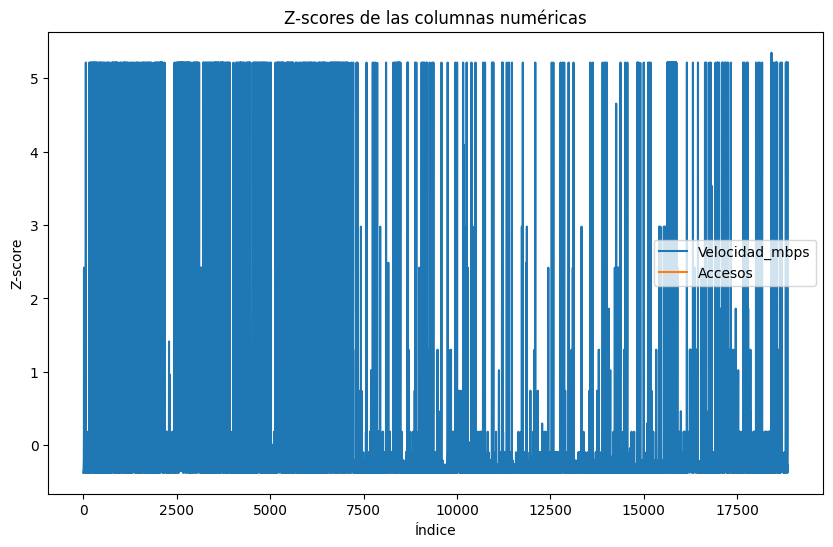

In [66]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [67]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           7172
CÓRDOBA                2211
SANTA FE               1892
ENTRE RÍOS              747
MENDOZA                 706
SALTA                   612
RÍO NEGRO               510
SANTIAGO DEL ESTERO     500
LA PAMPA                474
MISIONES                403
CHACO                   398
TUCUMÁN                 377
NEUQUÉN                 342
CORRIENTES              325
SAN JUAN                311
CHUBUT                  304
FORMOSA                 302
JUJUY                   300
SAN LUIS                247
LA RIOJA                239
CATAMARCA               217
SANTA CRUZ              154
TIERRA DEL FUEGO         66
CABA                     55
Name: count, dtype: int64

Conteo de categorías en la columna 'Partido':
Partido
GENERAL SAN MARTÍN     460
CAPITAL                373
LA MATANZA             340
SAN JUSTO              306
COLÓN                  286
                      ... 
LIHUEL CALEL             2

Observamos un amplio número de datos en Buenos Aires; Córdoba; Santa Fe.

In [68]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


No existen Valores negativos

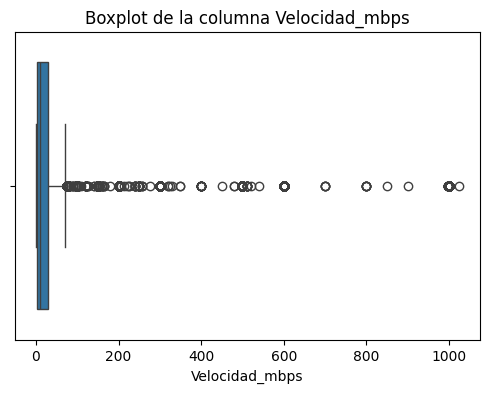

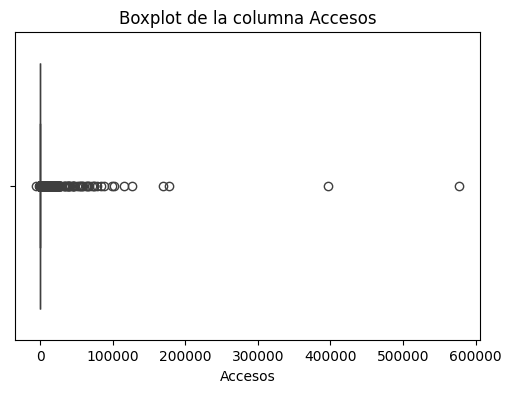

KeyboardInterrupt: 

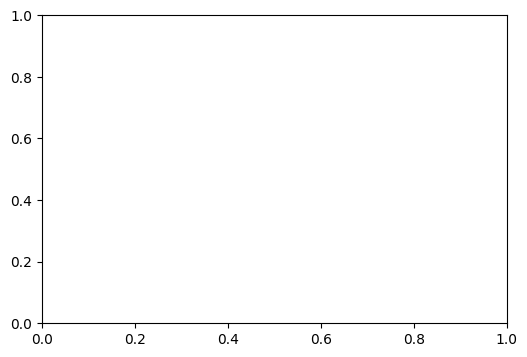

In [ ]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

En el Boxplot de Velocidad  se observan valores muy altos y muy bajos, lo cual puede deberse a cambios en las tecnologías lo cual aumenta los rangos de velocidad, en el boxplot de Accesos posiblemente son dependientes del tiempo ya que deberia estar relacionado con el tiempo.

In [ ]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Provincia         0
Partido           0
Localidad         1
Link indec        0
Velocidad_mbps    0
Accesos           0
dtype: int64


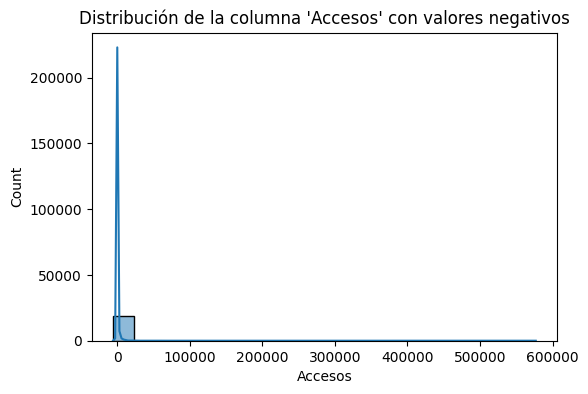

In [ ]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [ ]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")


Valores negativos en la columna 'Accesos': 4


In [ ]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [ ]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Provincia         0
Partido           0
Localidad         1
Link indec        0
Velocidad_mbps    0
Accesos           4
dtype: int64


In [ ]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Acc_vel_loc_sinrangos.csv


In [ ]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Velocidad_mbps     3.955505
Accesos           59.001344
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Velocidad_mbps      16.051812
Accesos           4683.930342
dtype: float64


El análisis de asimetría (skewness) y curtosis (kurtosis) ayuda a entender cómo se distribuyen los datos en las columnas numéricas de un DataFrame, proporcionando información adicional sobre la forma de las distribuciones. 

Velocidad (Mbps): 3.956

Este valor indica una asimetría positiva alta, es decir, la mayoría de los datos se encuentran en la parte baja del rango, pero hay valores extremos (colas largas) hacia la derecha.

Accesos: 58.990

Una asimetría extremadamente positiva. Esto sugiere que la mayoría de las provincias tienen muy pocos accesos, mientras que unas pocas tienen valores extremadamente altos que estiran la distribución hacia la derecha.

In [ ]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
         Variable       VIF
0           const  1.146326
1  Velocidad_mbps  1.001388
2         Accesos  1.001388


 Se realiza un análisis de multicolinealidad entre las variables numéricas en un conjunto de datos. La multicolinealidad ocurre cuando dos o más variables independientes están altamente correlacionadas entre sí, lo que puede afectar la interpretación de modelos estadísticos como la regresión lineal.
Todas las variables tienen un VIF cercano a 1, lo que indica que no existe multicolinealidad significativa entre ellas.
Esto significa que las variables numéricas en este conjunto de datos son independientes y no están correlacionadas de manera que afecten negativamente un modelo predictivo.

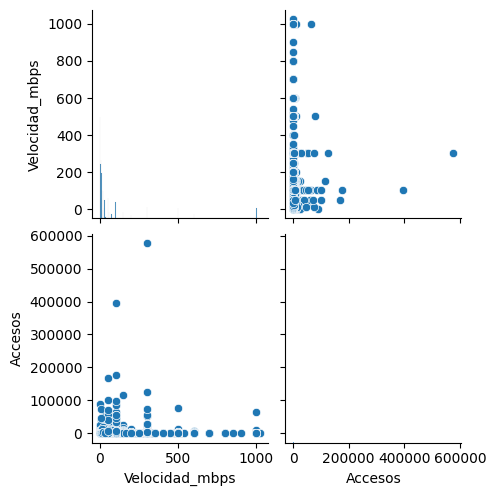

In [ ]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

REsultado igual a la matriz de correlación.

In [ ]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                    Velocidad_mbps                                          \
                             count        mean         std  min  25%   50%   
Provincia                                                                    
BUENOS AIRES                7172.0  110.024122  227.350421  0.0  4.0  15.0   
CABA                          55.0  156.327273  245.463888  0.0  7.5  50.0   
CATAMARCA                    217.0   46.359447  132.077698  0.0  0.0   5.0   
CHACO                        398.0   33.766332  119.361539  0.0  3.0   6.0   
CHUBUT                       304.0   24.641447   97.376136  0.0  0.0   4.0   
CORRIENTES                   325.0   28.076923  100.567419  0.0  1.0   5.0   
CÓRDOBA                     2211.0   42.255088  137.719789  0.0  3.0   8.0   
ENTRE RÍOS                   747.0   33.911647  125.463645  0.0  3.0   6.0   
FORMOSA                      302.0   13.768212   66.811128  0.0  3.0   5.0   
JUJUY                   

In [ ]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
186



Estadísticas por grupo de 'Provincia':
                     Velocidad_mbps       Accesos
Provincia                                        
BUENOS AIRES             110.024122    695.674847
CABA                     156.327273  27731.528302
CATAMARCA                 46.359447    345.963134
CHACO                     33.766332    369.577889
CHUBUT                    24.641447    573.101974
CORRIENTES                28.076923    485.509259
CÓRDOBA                   42.255088    491.078245
ENTRE RÍOS                33.911647    393.990629
FORMOSA                   13.768212    208.443709
JUJUY                     26.866667    398.946667
LA PAMPA                  19.320675    260.048523
LA RIOJA                  30.799163    367.571429
MENDOZA                   35.933428    427.270538
MISIONES                  25.198511    512.540943
NEUQUÉN                   34.997076    478.192982
RÍO NEGRO                 36.245098    337.335294
SALTA                     35.078431    328.988562
SAN JUAN  

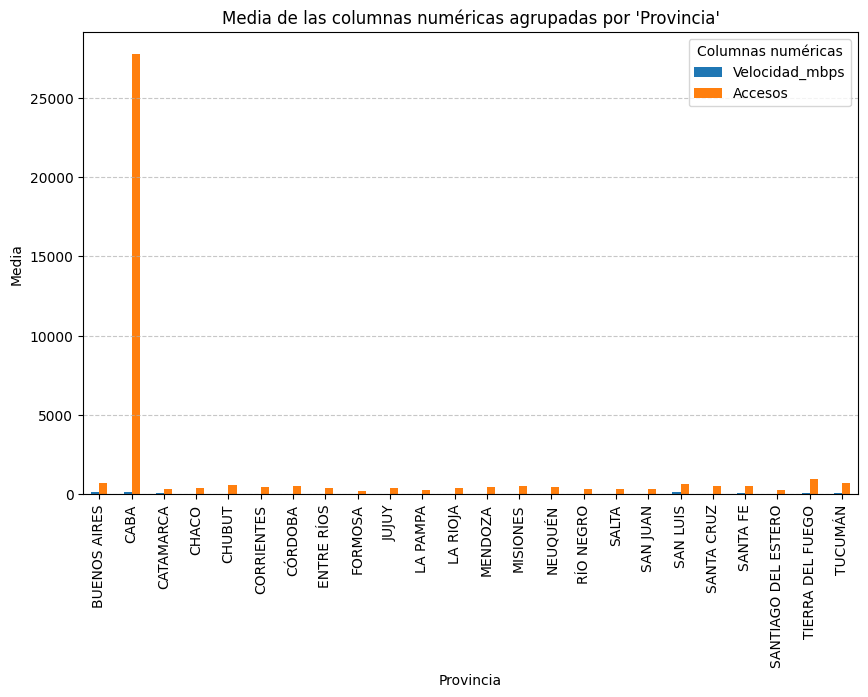


Estadísticas por grupo de 'Partido':
               Velocidad_mbps      Accesos
Partido                                   
12 DE OCTUBRE       10.000000    62.000000
1º DE MAYO           8.555556    39.444444
2 DE ABRIL          13.285714   111.571429
25 DE MAYO          23.229508   118.573770
9 DE JULIO          29.500000   186.853448
...                       ...          ...
ZAPALA               9.869565   300.956522
ZONDA               10.285714    50.142857
ZÁRATE              79.387097  1038.000000
ÑORQUINCÓ            1.750000     2.500000
ÑORQUÍN              3.833333    34.111111

[432 rows x 2 columns]


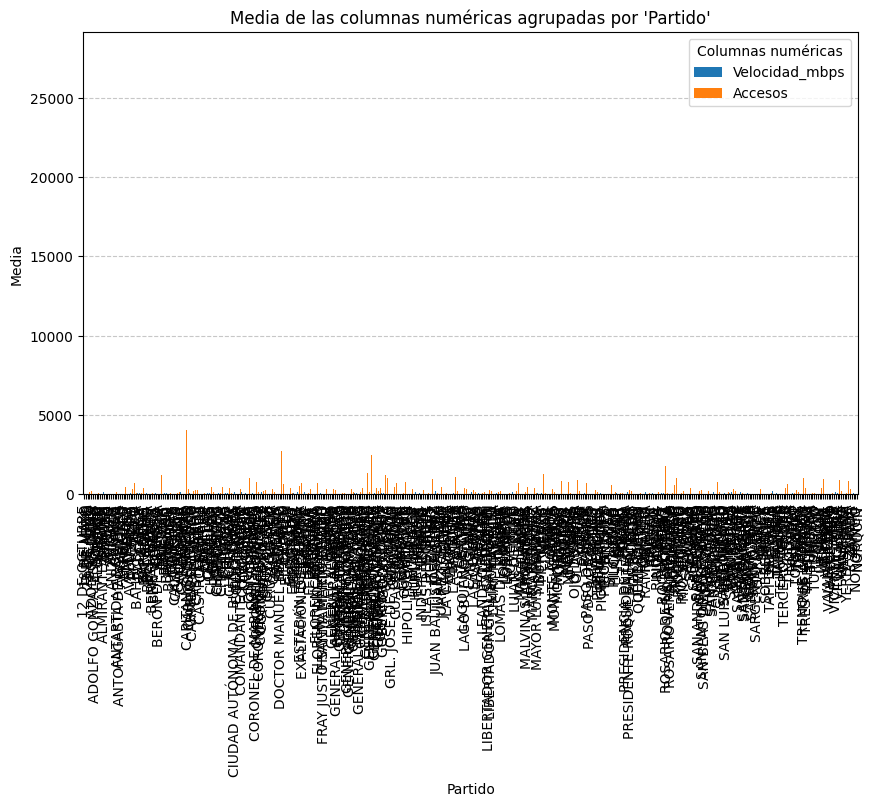


Estadísticas por grupo de 'Localidad':
                  Velocidad_mbps      Accesos
Localidad                                    
11 DE OCTUBRE          25.000000   225.000000
11 DE SEPTIEMBRE      163.214286    92.785714
12 DE OCTUBRE           3.000000    11.000000
1º DE MAYO              6.666667    46.333333
20 DE JUNIO           149.133333    51.666667
...                          ...          ...
ZÁRATE                 98.958333  1299.791667
ÁLVAREZ                 6.500000   255.333333
ÁRRAGA                  8.250000    21.750000
ÑANDUCITA               0.000000    37.000000
ÑORQUINCÓ               1.500000     3.500000

[2775 rows x 2 columns]


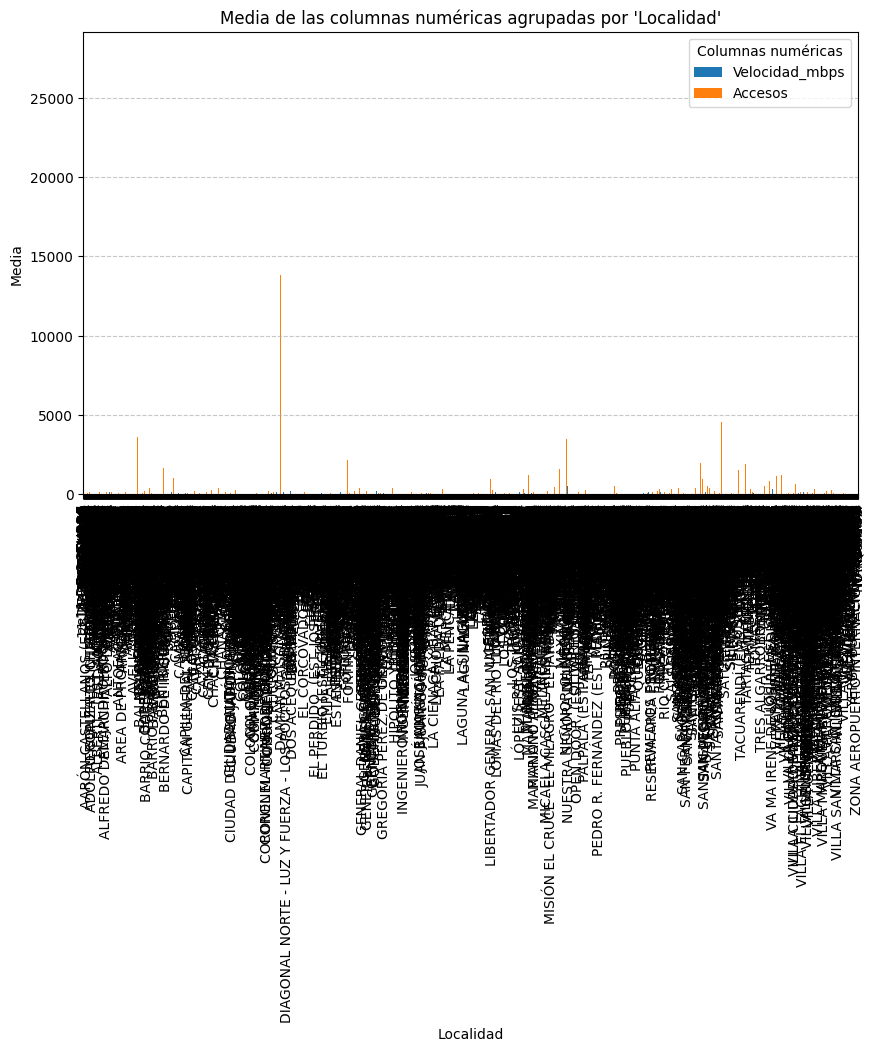


Estadísticas por grupo de 'Link indec':
            Velocidad_mbps      Accesos
Link indec                             
10007030          0.000000     1.000000
10007040          0.750000    38.250000
10007060          0.000000     2.500000
10007070          0.000000     1.000000
10007100          2.500000    33.000000
...                    ...          ...
94007010         29.458333  1359.291667
94007020          8.777778    39.777778
94014010          0.000000     1.000000
94014020         92.000000  1015.000000
Sin Datos        16.630435  1234.380597

[2665 rows x 2 columns]


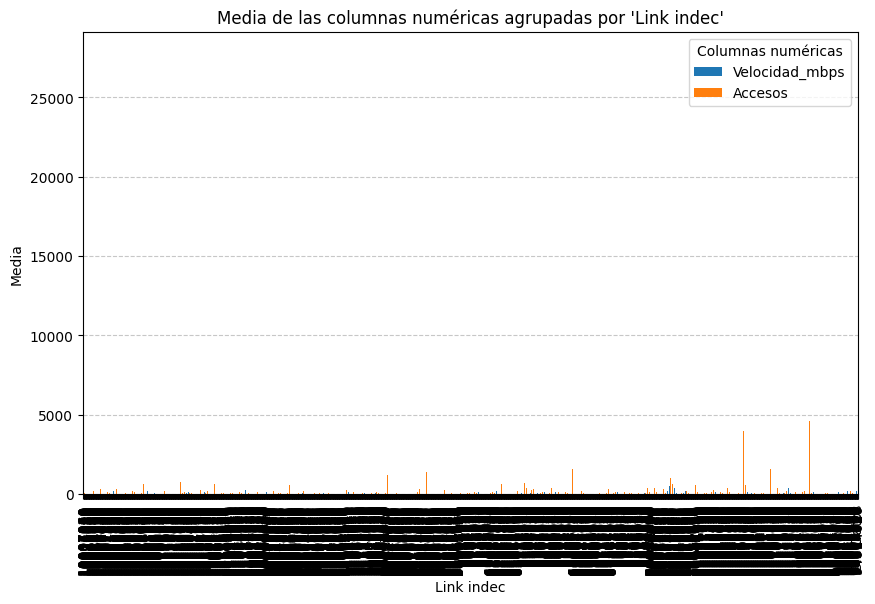

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [70]:
print(df.head())

      Provincia     Partido   Localidad Link indec  Velocidad_mbps  Accesos
0  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0      1.0
1  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0      2.0
2  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               0     19.0
3  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               3     85.0
4  BUENOS AIRES  25 DE MAYO  25 DE MAYO    6854100               3    145.0


# Análisis de Datos de Accesos y Velocidades

Este Jupyter Notebook realiza un análisis exhaustivo de un conjunto de datos que contiene información sobre accesos y velocidades de internet en diferentes provincias y localidades.

## Contenido

1. **Carga y Normalización de Datos**
    - Carga del archivo CSV y verificación de su existencia.
    - Normalización de nombres de columnas y reemplazo de variaciones específicas.

2. **Transformaciones y Limpieza de Datos**
    - Conversión de la columna 'Trimestre' a tipo int64.
    - Creación de la columna 'Trimestre_Label' basada en 'Trimestre'.
    - Reemplazo de valores específicos en las columnas 'Provincia', 'Partido' y 'Localidad'.

3. **Análisis Exploratorio de Datos**
    - Estadísticas descriptivas y visualización de histogramas.
    - Cálculo y visualización de la matriz de correlación.
    - Tablas de contingencia para columnas categóricas.
    - Cálculo de Z-scores y visualización de gráficos de caja.

4. **Manejo de Valores Faltantes y Atípicos**
    - Reemplazo de valores negativos por NaN.
    - Visualización de la cantidad de valores nulos por columna.

5. **Análisis Estadístico Avanzado**
    - Cálculo de skewness y kurtosis.
    - Verificación de multicolinealidad usando VIF.
    - Visualización de relaciones entre variables numéricas.

6. **Agrupamiento y Estadísticas por Categorías**
    - Estadísticas descriptivas agrupadas por columnas categóricas.
    - Verificación de filas duplicadas.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- SciPy
- Statsmodels
- OS

## Uso

1. Asegúrate de tener instaladas todas las dependencias necesarias.
2. Coloca el archivo CSV en la ruta especificada en el notebook.
3. Ejecuta las celdas del notebook en el orden indicado para reproducir el análisis.

## Resultados

El notebook proporciona una visión detallada de los datos, incluyendo estadísticas descriptivas, visualizaciones y análisis de correlación. También se manejan valores faltantes y atípicos para asegurar la calidad de los datos.

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre un issue o envía un pull request para discutir cualquier cambio que te gustaría realizar.

## Licencia

Este proyecto está bajo la Licencia MIT.
"""

# Guardar el contenido en un archivo README.md
with open("README.md", "w", encoding="utf-8") as f:
     f.write(readme_content)

print("README.md generado exitosamente.")

```markdown
## Observaciones y Conclusiones

- **Distribución de Datos**: La mayoría de los datos se concentran en la provincia de Buenos Aires, con una representación significativa también en Córdoba y Santa Fe. Esto puede indicar una mayor penetración de internet en estas áreas.

- **Velocidades de Internet**: Se observan velocidades de internet menores a 200 Mbps como las más comunes. Los valores atípicos en las velocidades pueden deberse a la adopción de nuevas tecnologías.

- **Accesos a Internet**: La mayoría de las provincias tienen pocos accesos, mientras que unas pocas tienen valores extremadamente altos. Esto sugiere una distribución desigual del acceso a internet.

- **Correlación**: No se encontró una relación significativa entre la velocidad de internet y el número de accesos, lo que indica que otros factores pueden estar influyendo en estas variables.

- **Valores Atípicos**: Los picos en los Z-scores indican la presencia de valores atípicos, que pueden ser errores o datos legítimos que requieren una revisión adicional.

- **Multicolinealidad**: No se encontró multicolinealidad significativa entre las variables numéricas, lo que sugiere que son independientes y no afectarán negativamente los modelos predictivos.

- **Valores Faltantes y Negativos**: Se manejaron adecuadamente los valores faltantes y negativos, reemplazándolos por NaN y asegurando la integridad de los datos.

Estas observaciones y conclusiones proporcionan una visión general del estado de los datos y pueden guiar futuras decisiones y análisis.
```